In [13]:
import plotnine as pn
import pandas as pd
import numpy as np

from sciterra import Atlas

In [3]:
# Load atlas
fn = "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=hafenLowredshiftLymanLimit2017"
atl = Atlas.load(fn)

len(atl)

10004

In [5]:
# Get vectors
embeddings = atl.projection.embeddings
embeddings.shape

(10004, 768)

In [19]:
# Get some metadata to annotate
from collections import Counter

# These fields of study are not singletons; one was up to 28 items long
fields = [Counter(pub.fields_of_study).most_common(1)[0][0] for id, pub in atl.publications.items()]

28

In [6]:
from sklearn.manifold import TSNE

In [14]:
# N.B.: takes 1.5 min

# normalize embeddings?
embeddings = embeddings / np.linalg.norm(embeddings, axis=1)[:, None]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

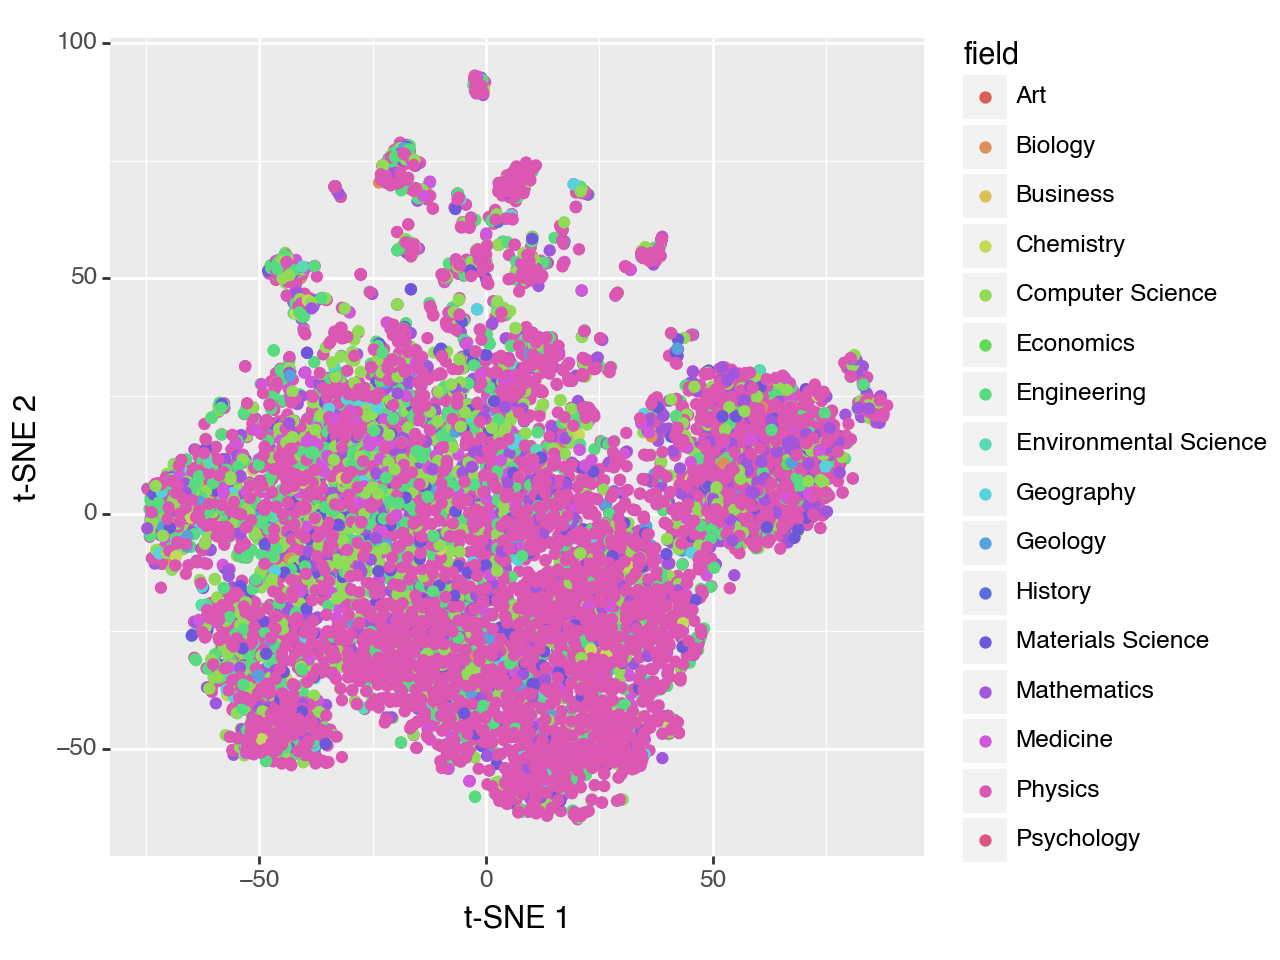

<Figure Size: (640 x 480)>

In [17]:
data = pd.DataFrame(
    embeddings_2d,
    columns=["t-SNE 1", "t-SNE 2"],
)
data["field"] = fields
(
    pn.ggplot(
        data,
        mapping=pn.aes(x="t-SNE 1", y="t-SNE 2")
    )
    + pn.geom_point(
        pn.aes(
            color="field",
        )
    )
)

## Can tSNE discriminate physics/linguistics?

In [20]:
fn2 = "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Imeletal2022"
atl2 = Atlas.load(fn2)
len(atl2)

10251

In [22]:
embeddings_ling = atl2.projection.embeddings
embeddings_ling.shape

(10251, 768)

In [23]:
# N.B.: this can take up to 6 min
all_embeddings = np.vstack([embeddings, embeddings_ling])

all_embeddings = all_embeddings / np.linalg.norm(all_embeddings, axis=1)[:, None]

tsne = TSNE(n_components=2, random_state=42)
all_embeddings_2d = tsne.fit_transform(all_embeddings)

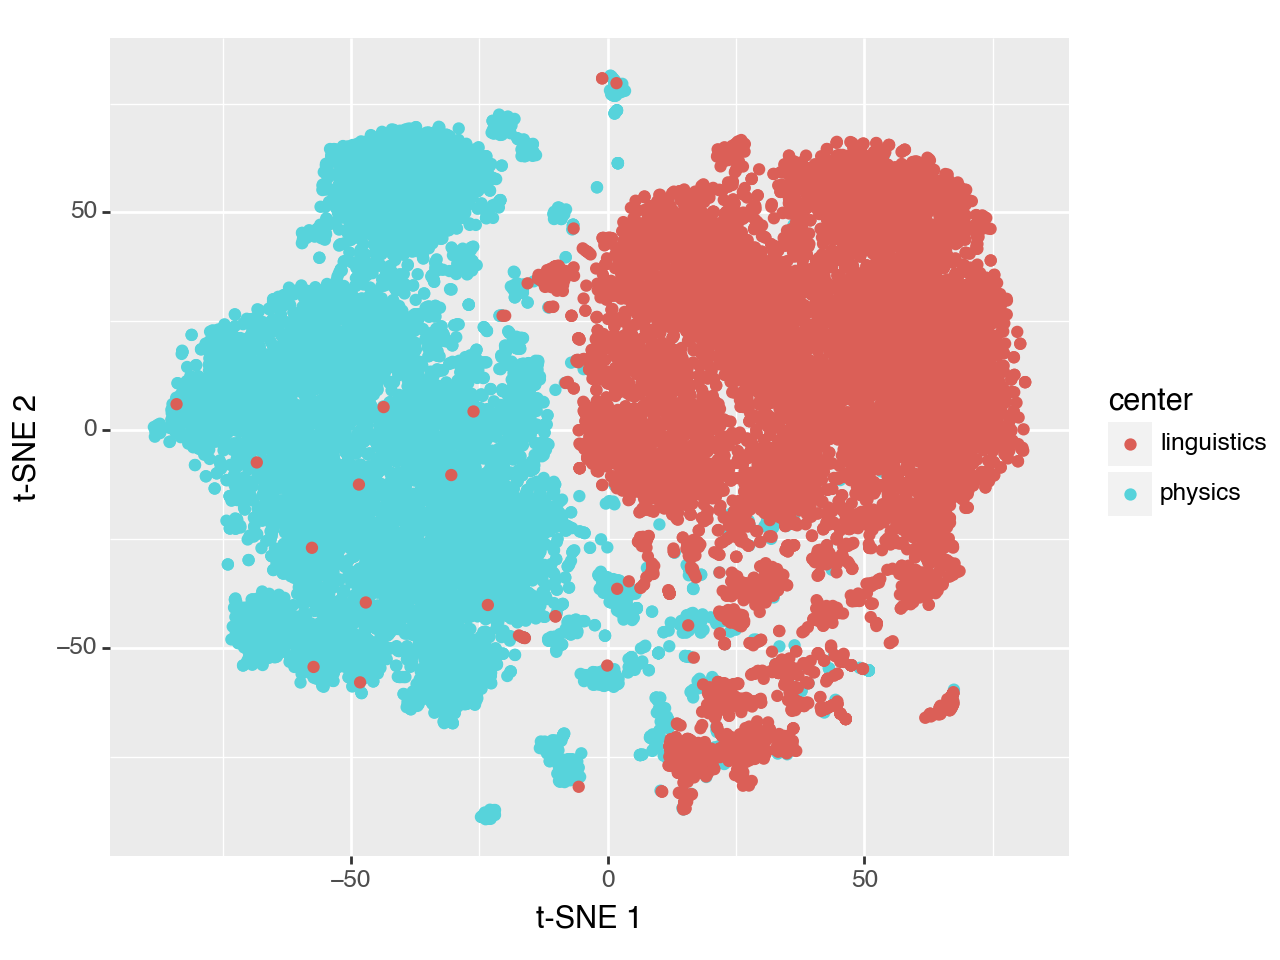

<Figure Size: (640 x 480)>

In [25]:
data = pd.DataFrame(
    all_embeddings_2d,
    columns=["t-SNE 1", "t-SNE 2"],
)
data["center"] = ["physics"]*len(embeddings) + ["linguistics"]*len(embeddings_ling)
(
    pn.ggplot(
        data,
        mapping=pn.aes(x="t-SNE 1", y="t-SNE 2")
    )
    + pn.geom_point(
        pn.aes(
            color="center",
        )
    )
)